# **Internship on Data Science and Analytics**

#**Credit Score Classification Model Development**

I have done all Exploratory Data Analysis,data Preprocessing, Model Building and Model Evaluation in the previous weeks.

In week 3, the steps include:
 1. Hyperparameter Tuning
 2. Cross-Validation
 3. Model Interpretability
 4. Performance Validation
 5. Threshold Selection

####**Import Packages and Modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

 # Model Accuracy
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score,confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')



###**Load Dataset**

In [ ]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
data=pd.read_csv("/content/credit.csv")
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
data.shape

(100000, 28)

In [ ]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

####**Remove Unnecessary Features**

In [ ]:
data.drop(['ID','Customer_ID','Name','SSN'],axis=1,inplace=True)

As we have done in prevoius weeks there is no missing values in the datset.

There are outliers in 10 features out of 19 numeric features in the dataset, But as we know there are some classification models which are not sensitive to outliers ,So use them first, then I will handle outliers and use the rest of the algorithms. Finally I will find the best among them.

##**Encoding**

**One Hot Encoding**

In [ ]:
# One Hot Encoding for data

ohe_ch_cols=['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']

# these columns contain small number of unique values ..so One hot encoding is preffered

data = pd.get_dummies(data, columns=ohe_ch_cols,dtype=int)


**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['Credit_Score']=le.fit_transform(data['Credit_Score'])

**Frequency Encoding**

In [ ]:
frequency_encoding = data['Type_of_Loan'].value_counts().to_dict()
data['Type_of_Loan'] = data['Type_of_Loan'].map(frequency_encoding)

In [ ]:
data.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,8,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.46538,312.494089,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,8,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.46538,284.629162,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,8,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.46538,331.209863,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,8,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.46538,223.451310,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,8,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.46538,341.489231,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [ ]:
data['Type_of_Loan'].nunique()

38

In [ ]:
data.shape

(100000, 47)

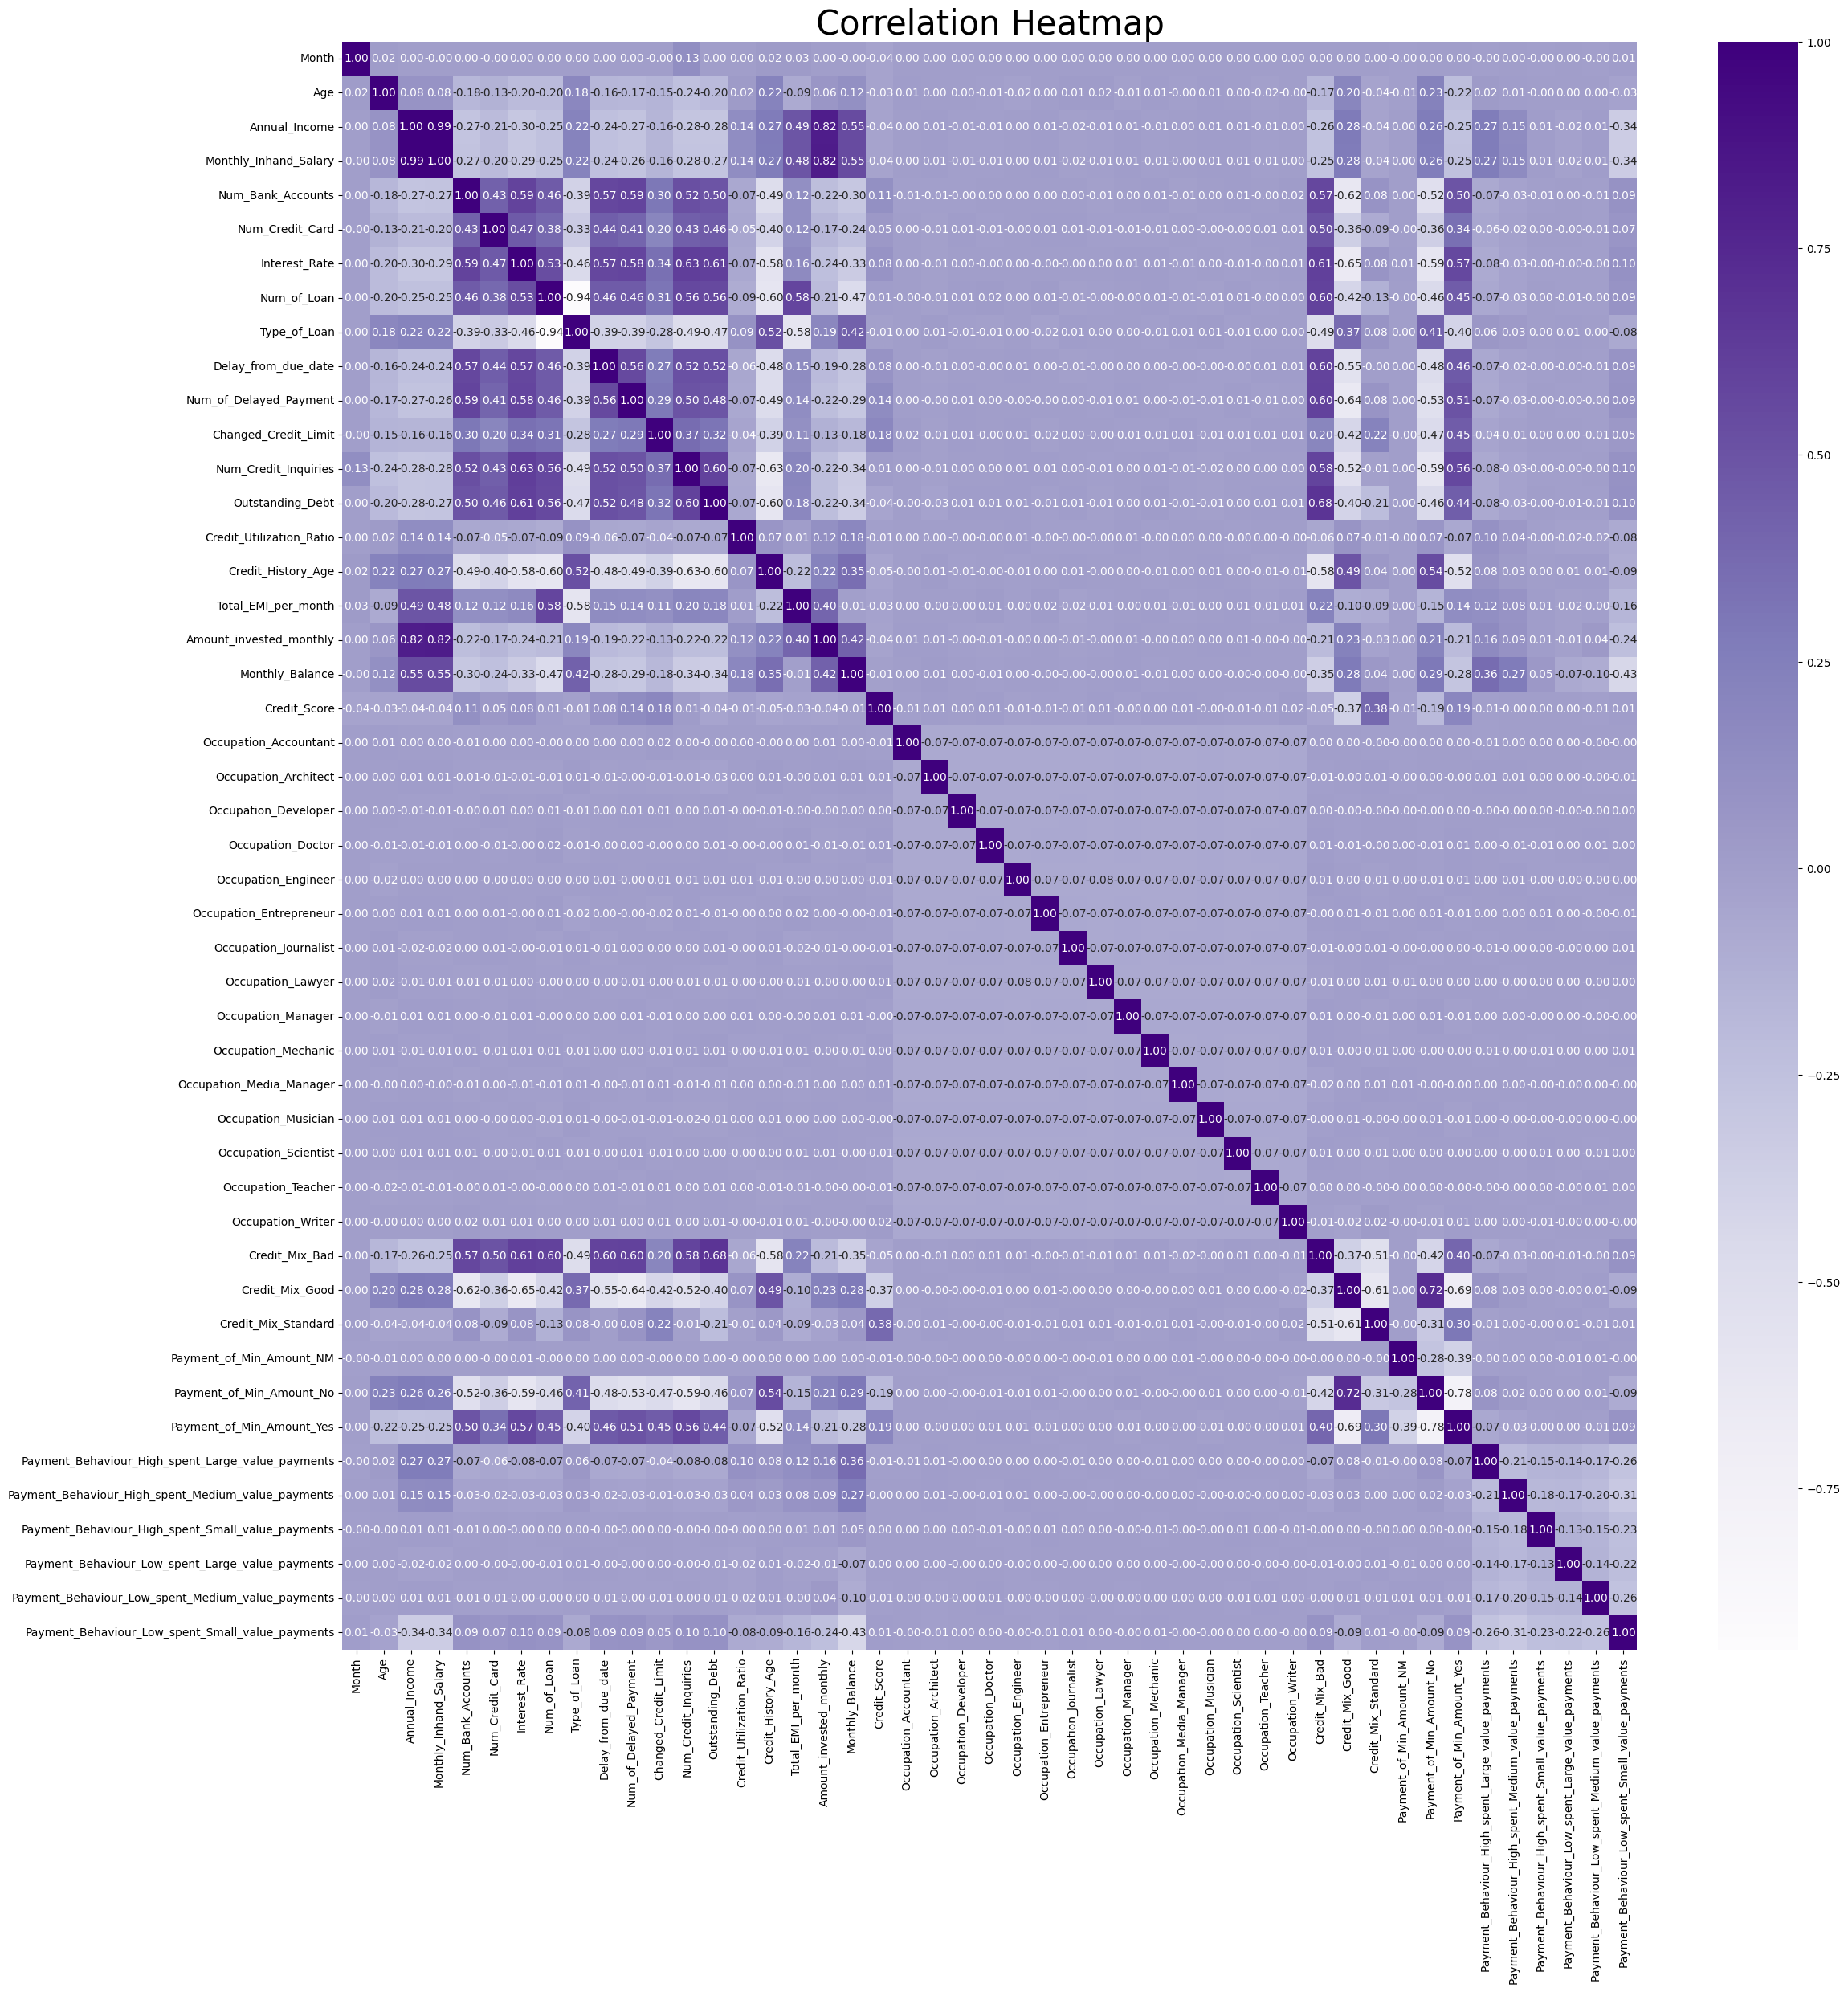

In [ ]:
plt.figure(figsize=(26,26))
sns.heatmap(data.corr(method='spearman'),
           annot=True,cmap='Purples',fmt='.2f')
plt.title('Correlation Heatmap',fontsize=30);

In [ ]:
# Drop features which will not help in predicting

data.drop(['Type_of_Loan','Monthly_Inhand_Salary'],axis=1,inplace=True)

In [ ]:
data.shape

(100000, 45)

##**Data Split**

In [ ]:
# Split data into independent features (X) and target (y)
X = data.drop('Credit_Score',axis=1)
y =data['Credit_Score']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Print the sizes of each set

print(f"Training set: {len(X_train)}")
print(f"Testing set: {len(X_test)}")

Training set: 75000
Testing set: 25000


**Scaling**

In [ ]:

sc=StandardScaler()

# Now the preprocessed independent features 'X' is scaled and named as X_sc.

scaled=sc.fit_transform(X)
X_sc=pd.DataFrame(scaled)
X_sc

**Data Split With Scaled Data**

In [ ]:
# Split data into training and test sets with scaled data

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y, test_size=0.25, random_state=42)

In [ ]:
# Print the sizes of each set

print(f"Training set: {len(X_train_sc)}")
print(f"Testing set: {len(X_test_sc)}")

Training set: 75000
Testing set: 25000


#**Model Development and Training**

**Decision** **Tree**

In [ ]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_pred= dt_clf.predict(X_test)

print('Accuracy:',accuracy_score(y_test,dt_pred))
print('Precision:',precision_score(y_test,dt_pred,average='weighted'))
print('recall:',recall_score(y_test,dt_pred,average='weighted'))
print('F1:',f1_score(y_test,dt_pred,average='weighted'))
print('classification_report:\n',classification_report(y_test,dt_pred))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,dt_pred))

Accuracy: 0.74728
Precision: 0.7469139464102258
recall: 0.74728
F1: 0.7470573667967684
classification_report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.69      4422
           1       0.74      0.72      0.73      7313
           2       0.77      0.78      0.78     13265

    accuracy                           0.75     25000
   macro avg       0.73      0.73      0.73     25000
weighted avg       0.75      0.75      0.75     25000


Confusion Matrix:
 [[ 3019   166  1237]
 [  164  5301  1848]
 [ 1171  1732 10362]]


**Random** **Forest**

In [ ]:
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)

print('Accuracy:',accuracy_score(y_test,rf_pred))
print('Precision:',precision_score(y_test,rf_pred,average='weighted'))
print('recall:',recall_score(y_test,rf_pred,average='weighted'))
print('F1:',f1_score(y_test,rf_pred,average='weighted'))
print('classification_report:\n',classification_report(y_test,rf_pred))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,rf_pred))

Accuracy: 0.826
Precision: 0.8266064963381066
recall: 0.826
F1: 0.8260937003868836
classification_report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      4422
           1       0.81      0.85      0.83      7313
           2       0.85      0.83      0.84     13265

    accuracy                           0.83     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.83      0.83      0.83     25000


Confusion Matrix:
 [[ 3510    30   882]
 [   63  6184  1066]
 [  871  1438 10956]]


**Gradient Boosting**

In [ ]:
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(X_train, y_train)
gb_pred = gradient_boosting_classifier.predict(X_test)

print('Accuracy:',accuracy_score(y_test,gb_pred))
print('Precision:',precision_score(y_test,gb_pred,average='weighted'))
print('recall:',recall_score(y_test,gb_pred,average='weighted'))
print('F1:',f1_score(y_test,gb_pred,average='weighted'))
print('classification_report:\n',classification_report(y_test,gb_pred))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,gb_pred))

Accuracy: 0.71484
Precision: 0.7204543909266043
recall: 0.71484
F1: 0.7157420400368527
classification_report:
               precision    recall  f1-score   support

           0       0.59      0.71      0.64      4422
           1       0.74      0.65      0.69      7313
           2       0.75      0.75      0.75     13265

    accuracy                           0.71     25000
   macro avg       0.69      0.70      0.70     25000
weighted avg       0.72      0.71      0.72     25000


Confusion Matrix:
 [[3141   59 1222]
 [ 509 4749 2055]
 [1688 1596 9981]]


**KNN**

Text(0, 0.5, 'Metric K')

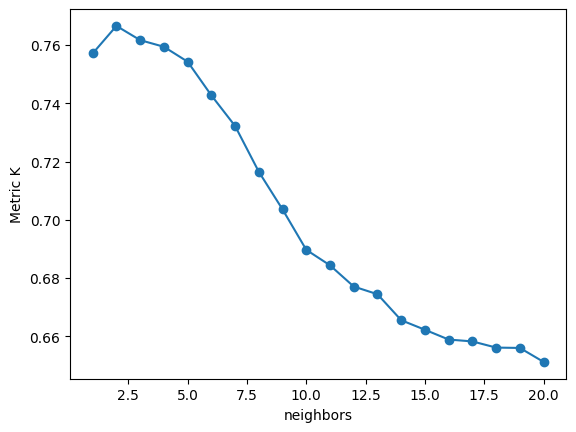

In [ ]:
metric_k=[]
neighbors=np.arange(1,21)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  classifier.fit(X_train,y_train)
  knn_pred=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

plt.plot(neighbors,metric_k,'o-')
plt.xlabel('neighbors')
plt.ylabel('Metric K')

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=2,metric='euclidean')
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

print('Accuracy:',accuracy_score(y_test,knn_pred))
print('Precision:',precision_score(y_test,knn_pred,average='weighted'))
print('recall:',recall_score(y_test,knn_pred,average='weighted'))
print('F1:',f1_score(y_test,knn_pred,average='weighted'))
print('classification_report:\n',classification_report(y_test,knn_pred))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,knn_pred))

Accuracy: 0.76656
Precision: 0.7909704362185372
recall: 0.76656
F1: 0.7658941201227726
classification_report:
               precision    recall  f1-score   support

           0       0.64      0.86      0.73      4422
           1       0.73      0.89      0.80      7313
           2       0.88      0.67      0.76     13265

    accuracy                           0.77     25000
   macro avg       0.75      0.81      0.76     25000
weighted avg       0.79      0.77      0.77     25000


Confusion Matrix:
 [[3788   69  565]
 [ 103 6531  679]
 [2057 2363 8845]]


**Logistic Regression**

In [ ]:
log_reg=LogisticRegression()

log_reg.fit(X_train,y_train)
log_pred=log_reg.predict(X_test)

print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred,average='weighted'))
print('recall:',recall_score(y_test,log_pred,average='weighted'))
print('F1:',f1_score(y_test,log_pred,average='weighted'))
print('classification_report:\n',classification_report(y_test,log_pred) )

print('\nConfusion Matrix:\n',confusion_matrix(y_test,log_pred))

Accuracy: 0.54464
Precision: 0.5225689825827314
recall: 0.54464
F1: 0.48360636129272416
classification_report:
               precision    recall  f1-score   support

           0       0.42      0.04      0.07      4422
           1       0.53      0.33      0.41      7313
           2       0.55      0.83      0.66     13265

    accuracy                           0.54     25000
   macro avg       0.50      0.40      0.38     25000
weighted avg       0.52      0.54      0.48     25000


Confusion Matrix:
 [[  174    89  4159]
 [   28  2438  4847]
 [  208  2053 11004]]


The Model that I have choosen intially is random Forset. Beacuse it has high metric scores.

####**Naive Bayes**

In [ ]:

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
nb_pred = naive_bayes_classifier.predict(X_test)

print('Accuracy:',accuracy_score(y_test,nb_pred))
print('Precision:',precision_score(y_test,nb_pred,average='weighted'))
print('recall:',recall_score(y_test,nb_pred,average='weighted'))
print('F1:',f1_score(y_test,nb_pred,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,nb_pred))

Accuracy: 0.61256
Precision: 0.6870986855390595
recall: 0.61256
F1: 0.6159776799927756

Confusion Matrix:
 [[3659  106  657]
 [1252 5194  867]
 [3837 2967 6461]]


####**LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

print('Accuracy:',accuracy_score(y_test,lda_pred))
print('Precision:',precision_score(y_test,lda_pred,average='weighted'))
print('recall:',recall_score(y_test,lda_pred,average='weighted'))
print('F1:',f1_score(y_test,lda_pred,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,lda_pred))

Accuracy: 0.66164
Precision: 0.6864720142004301
recall: 0.66164
F1: 0.6647313578113435

Confusion Matrix:
 [[3590   59  773]
 [1094 4262 1957]
 [2469 2107 8689]]


####**SVM**

In [ ]:
sv_clf=SVC()
sv_clf.fit(X_train,y_train)
sv_pred=sv_clf.predict(X_test)

print('Accuracy:',accuracy_score(y_test,sv_pred))
print('Precision:',precision_score(y_test,sv_pred,average='weighted'))
print('recall:',recall_score(y_test,sv_pred,average='weighted'))
print('F1:',f1_score(y_test,sv_pred,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test,sv_pred))

Accuracy: 0.53296
Precision: 0.5153386374871747
recall: 0.53296
F1: 0.4547956039335072

Confusion Matrix:
 [[  117    78  4227]
 [   38  1711  5564]
 [   90  1679 11496]]


####**Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300,alpha=0.0001, random_state=42)
mlp_clf.fit(X_train_sc, y_train_sc)

mlp_pred = mlp_clf.predict(X_test_sc)

print('Accuracy:',accuracy_score(y_test_sc,mlp_pred))
print('Precision:',precision_score(y_test_sc,mlp_pred,average='weighted'))
print('recall:',recall_score(y_test_sc,mlp_pred,average='weighted'))
print('F1:',f1_score(y_test_sc,mlp_pred,average='weighted'))

print('\nConfusion Matrix:\n',confusion_matrix(y_test_sc,mlp_pred))

Accuracy: 0.7452
Precision: 0.7467546176184463
recall: 0.7452
F1: 0.7456311535767274

Confusion Matrix:
 [[3063  152 1207]
 [ 188 5582 1543]
 [1309 1971 9985]]


**Initially the best among the model is Random Forest with accuracy and precision 0.825 followed by KNN with precision of 0.79 .**

Now try running the model with scaled data also, to check if there is any increase in precision and accuracy.

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train_sc,y_train_sc)
rf_prd=rf_clf.predict(X_test_sc)

print('Accuracy:',accuracy_score(y_test_sc,rf_prd))
print('Precision:',precision_score(y_test_sc,rf_prd,average='weighted'))
print('recall:',recall_score(y_test_sc,rf_prd,average='weighted'))
print('F1:',f1_score(y_test_sc,rf_prd,average='weighted'))
print('classification_report:\n',classification_report(y_test_sc,rf_prd))

print('\nConfusion Matrix:\n',confusion_matrix(y_test_sc,rf_prd))

Accuracy: 0.574
Precision: 0.5948225102523154
recall: 0.574
F1: 0.481351171657142
classification_report:
               precision    recall  f1-score   support

           0       0.49      0.83      0.62      4422
           1       0.63      0.01      0.02      7313
           2       0.61      0.80      0.69     13265

    accuracy                           0.57     25000
   macro avg       0.58      0.55      0.44     25000
weighted avg       0.59      0.57      0.48     25000


Confusion Matrix:
 [[ 3681     3   738]
 [ 1192    65  6056]
 [ 2626    35 10604]]


Accuracy and precision is less for the model with scaled data.

##**visualize random forest classifier**

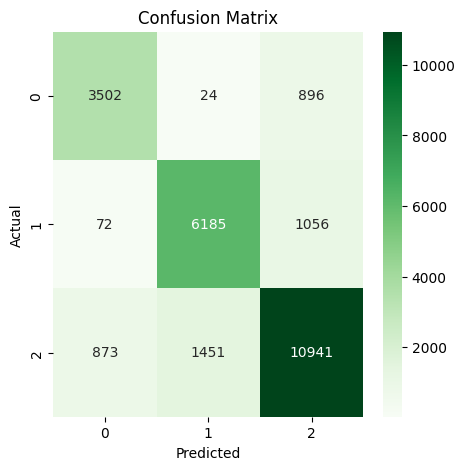

In [ ]:
cm=confusion_matrix(y_test,rf_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

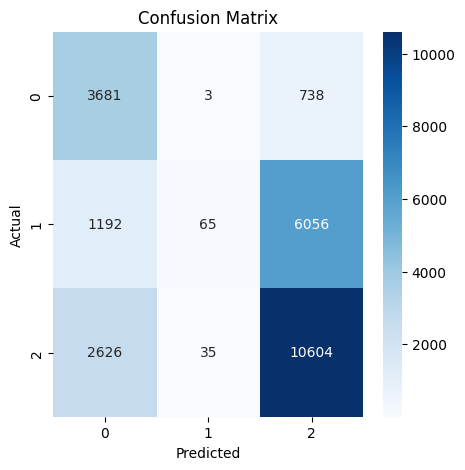

In [ ]:
#for model with scaled data

cm_sc=confusion_matrix(y_test_sc,rf_prd)
plt.figure(figsize=(5,5))
sns.heatmap(cm_sc,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##**Hyperparameter Tuning**

**Hyperparameters** are the parameters whose values control the learning process. These are adjustable parameters used to obtain an optimal model.External Prameters.

Eg., 1. Learning Rate :How much we want to change the weight and bias.
2. Number of Epochs: number of iterations - that means how much time our model will go through the dataset.
3. n_estmators: the number of decision trees that we want in our random forest.(particularly for the random forest model).

**Hyperparameter Tuning** refers to the process of choosing the optimum set of hyperparameters for a machine learning model.This process is also called Hyperparameter Optimization. The purpose of hyperparameter tuning is to optimize performance.

Common Hypreparameter Techniques include:
1. GridsearchCV
2. RandomsearchCV

In [ ]:

# Define the model
rf_clf = RandomForestClassifier()

# Define the parameter grid
param_dist = {
    'n_estimators': np.arange(10, 200, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None,5,15,25],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'bootstrap': [True, False]
}

# Define the RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,        # 5-fold cross-validation
    verbose=2,   # Verbosity level
    random_state=42,
    n_jobs=-1    # Use all available cores
)

# Fit the RandomizedSearchCV to the data
rf_random.fit(X, y)

# Print the best parameters and the best score
print(f"Best parameters found: {rf_random.best_params_}")
print(f"Best cross-validation score: {rf_random.best_score_}")


In [ ]:

# Fit the model with the best parameters on the entire training data

best_rf = RandomForestClassifier(
    n_estimators=150,
    min_samples_split=2,
    min_samples_leaf=5,
    max_features='auto',
    max_depth=20,
    bootstrap=True,
    random_state=42
)

best_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred,average='weighted'))
print('recall:',recall_score(y_test, y_pred,average='weighted'))
print('F1:',f1_score(y_test, y_pred,average='weighted'))
print('classification_report:\n',classification_report(y_test, y_pred))

print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred))




Accuracy: 0.78748
Precision: 0.7897172424575758
recall: 0.78748
F1: 0.7880881703190026
classification_report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      4422
           1       0.79      0.77      0.78      7313
           2       0.82      0.80      0.81     13265

    accuracy                           0.79     25000
   macro avg       0.77      0.78      0.78     25000
weighted avg       0.79      0.79      0.79     25000


Confusion Matrix:
 [[ 3463    39   920]
 [  318  5603  1392]
 [ 1160  1484 10621]]


**Gridsearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_clf=RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


In [ ]:
classifier.cv_results_

In [ ]:
# Best parameters

best_parameters=classifier.best_params_
print(best_parameters)

highest_accuracy=classifier.best_score_
print(highest_accuracy)

###**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_cl, X_dt, y_dt, cv=5)
scores

array([0.69515, 0.70115, 0.7044 , 0.6937 , 0.7086 ])

In [ ]:
scores.mean()

0.7006000000000001

In [ ]:
for cv in [3, 5, 10]:
    scrs = cross_val_score(rf_cl, X_dt, y, cv=cv)
    print(f"CV={cv}: Mean cross-validated score: {scrs.mean()} (Scores: {scrs})")

CV=3: Mean cross-validated score: 0.7008500441397286 (Scores: [0.69643607 0.70455705 0.70155702])
CV=5: Mean cross-validated score: 0.6991900000000001 (Scores: [0.69425 0.70205 0.70075 0.69455 0.70435])
CV=10: Mean cross-validated score: 0.69798 (Scores: [0.6986 0.6873 0.7004 0.6918 0.6961 0.707  0.6966 0.6877 0.6998 0.7145])


###**Feature Importance**

In [ ]:

imp_features=pd.DataFrame({'Feature':X.columns,'Importance':rf_clf.feature_importances_})
imp_features.sort_values(by='Importance',ascending=False)

,Feature,Importance
11,Outstanding_Debt,0.098327
5,Interest_Rate,0.077338
13,Credit_History_Age,0.059700
7,Delay_from_due_date,0.055994
9,Changed_Credit_Limit,0.053901
16,Monthly_Balance,0.045562
12,Credit_Utilization_Ratio,0.042799
33,Credit_Mix_Good,0.042350
14,Total_EMI_per_month,0.041739
2,Annual_Income,0.041597


In [ ]:
# Craete a copy of the data set to drop the features having less importance

dt=data.copy()
dt.shape

(100000, 45)

In [ ]:
dt.drop(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer','Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'],inplace=True,axis=1)

dt.shape

(100000, 21)

With the reduced number of featres split data and build model again to see if there is increased accuracy.

In [ ]:
#Split the data
X_dt=dt.drop('Credit_Score',axis=1)
y_dt=dt['Credit_Score']

#Split the data into training and testing sets
X_trn,X_tst,y_trn,y_tst=train_test_split(X_dt,y_dt,test_size=0.25,random_state=42)


####**Feature Reduction Using Mutual Information Score**

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_dt, y_dt)

mi_df = pd.DataFrame({
    'Feature': X_dt.columns,
    'MI Score': mi_scores
})

# Sort the DataFrame by MI Score in descending order
mi_df_sorted = mi_df.sort_values(by='MI Score', ascending=False)

# Print the sorted DataFrame
print(mi_df_sorted)

                     Feature  MI Score
2              Annual_Income  0.625004
15   Amount_invested_monthly  0.618810
11          Outstanding_Debt  0.612305
14       Total_EMI_per_month  0.565856
5              Interest_Rate  0.173538
18           Credit_Mix_Good  0.141090
10      Num_Credit_Inquiries  0.121007
7        Delay_from_due_date  0.120618
4            Num_Credit_Card  0.109710
9       Changed_Credit_Limit  0.104796
3          Num_Bank_Accounts  0.104534
13        Credit_History_Age  0.100865
6                Num_of_Loan  0.089960
17            Credit_Mix_Bad  0.087176
19       Credit_Mix_Standard  0.086345
8     Num_of_Delayed_Payment  0.086039
16           Monthly_Balance  0.037106
1                        Age  0.025600
0                      Month  0.003782
12  Credit_Utilization_Ratio  0.000000


In [ ]:
import plotly.graph_objects as go
sorted_mi_scores = sorted(zip(X_dt.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]

colorscale = 'Magma'

fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Mutual Information Score', len=0.5, y=0.2)))])

fig.update_layout(title='Mutual Information Scores for Each Feature',
                  xaxis_title='Features',
                  yaxis_title='Mutual Information Score',
                  xaxis=dict(tickangle=-90),
                  coloraxis=dict(colorscale=colorscale))

fig.show()

###**Feature Selection**

In [ ]:
#   Try feature selection also to determine the features to be kept for modelling

from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
forward_feature_selection = SequentialFeatureSelector(
    RandomForestClassifier(),
    k_features=(1, 16),
    forward=True,
    scoring="precision",
    cv=5
).fit(X_trn,y_trn)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [ ]:
forward_feature_selection.k_feature_idx_

In [ ]:
forward_feature_selection.k_feature_names_

In [ ]:
dt=pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
dt

AttributeError: SequentialFeatureSelector has not been fitted, yet.

####**Features dropped based on feature importance , forward feature selection or MI scores**

In [ ]:
dt1=dt.drop(['Monthly_Balance','Age','Month','Credit_Utilization_Ratio'],axis=1)
dt1.shape

(100000, 17)

In [ ]:
X_dt1=dt1.drop('Credit_Score',axis=1)
y_dt1=dt1['Credit_Score']

X_tr,X_ts,y_tr,y_ts=train_test_split(X_dt1,y_dt1,test_size=0.25,random_state=42)

In [ ]:
rf_clfr=RandomForestClassifier()
rf_clfr.fit(X_tr,y_tr)
rf_prdt=rf_clfr.predict(X_ts)

print('Accuracy:',accuracy_score(y_ts,rf_prdt))
print('Precision:',precision_score(y_ts,rf_prdt,average='weighted'))
print('recall:',recall_score(y_ts,rf_prdt,average='weighted'))
print('F1:',f1_score(y_ts,rf_prdt,average='weighted'))
print('classification_report:\n',classification_report(y_ts,rf_prdt))

print('\nConfusion Matrix:\n',confusion_matrix(y_ts,rf_prdt))

Accuracy: 0.81616
Precision: 0.8165321567627997
recall: 0.81616
F1: 0.8162237989455458
classification_report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      4422
           1       0.81      0.83      0.82      7313
           2       0.84      0.82      0.83     13265

    accuracy                           0.82     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.82      0.82      0.82     25000


Confusion Matrix:
 [[ 3473    14   935]
 [   16  6091  1206]
 [  964  1461 10840]]


**Finally , I got a Random Forest model with Precision and accuracy of 0.81.**

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_clfr, X_dt1, y_dt1, cv=5)
scores

array([0.69275, 0.6976 , 0.69315, 0.68655, 0.69675])

In [ ]:
scores.mean()

0.69336

####**Check for overfitting or Underfitting**

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf_clfr.score(X_tr, y_tr)))

print('Test set score: {:.4f}'.format(rf_clfr.score(X_ts, y_ts)))

Training set score: 0.9997
Test set score: 0.8162


**Threshold Selection**

In [ ]:
y_pred_proba = rf_clfr.predict_proba(X_ts)

In [ ]:
from sklearn.preprocessing import label_binarize

# Assuming your classes are [0, 1, 2]
y_bin = label_binarize(y_ts, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

In [ ]:
from sklearn.metrics import precision_recall_curve


# Initialize dictionaries to store precision, recall, and F1 scores
precision = {}
recall = {}
f1_scores = {}
thresholds = {}

# Compute Precision-Recall and F1 score for each class
for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_bin[:, i], y_pred_proba[:, i])
    f1_scores[i] = [f1_score(y_bin[:, i], y_pred_proba[:, i] >= t) for t in thresholds[i]]

# Find the optimal threshold for each class based on the maximum F1 score
optimal_thresholds = {}
for i in range(n_classes):
    optimal_idx = np.argmax(f1_scores[i])
    optimal_thresholds[i] = thresholds[i][optimal_idx]

print("Optimal Thresholds:", optimal_thresholds)


Optimal Thresholds: {0: 0.32, 1: 0.2516666666666667, 2: 0.47}


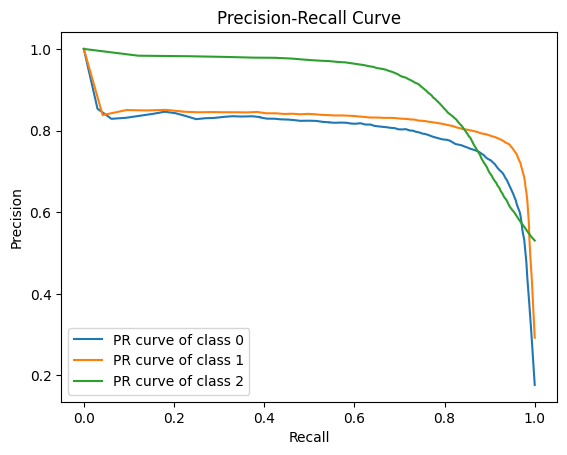

In [ ]:

plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'PR curve of class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


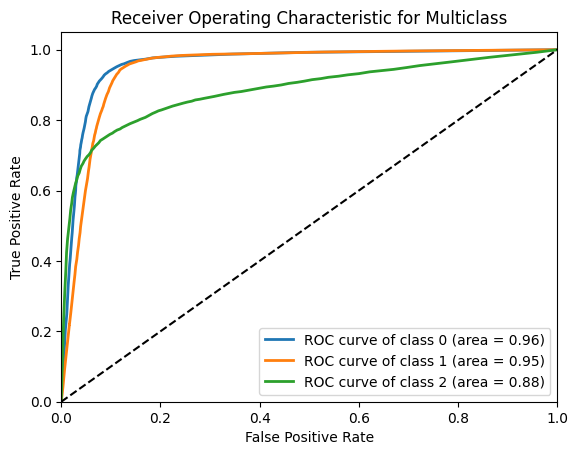

In [ ]:

# Binarize the output labels for multiclass
y_bin = label_binarize(y_ts, classes=[0, 1, 2])  # Adjust classes based on your problem
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc='lower right')
plt.show()


**For Deployment create a pickled file**

In [ ]:
import pickle
pickle.dump(rf_clfr,open('model.pkl','wb'))

**Check whether the prediction is correct**

In [ ]:
rf_clfr.predict([[19114.12,	3.0,	4.0,	3.0,	4.0,	3.0,	7.0,	11.27,	4.0	,809.98,	265.0,	49.574949,	21.465380,0,	1,	0]])

array([0])

In [ ]:
rf_clfr.predict([[20002.88,10.0,	8.0,	29.0,	5.0	,33.0,	25.0,	18.31,	9.0,	3571.70,	74.0,	60.964772,	34.662906,1,0,	0]])

array([2])

The rf_clfr (random forest) model is predicting correctly for the data input.

In [ ]:
dt1.tail(5)

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Credit_Score,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
99995,39628.99,4.0,6.0,7.0,2.0,23.0,7.0,11.5,3.0,502.38,378.0,35.104023,24.028477,1,0,1,0
99996,39628.99,4.0,6.0,7.0,2.0,18.0,7.0,11.5,3.0,502.38,379.0,35.104023,24.028477,1,0,1,0
99997,39628.99,4.0,6.0,7.0,2.0,27.0,6.0,11.5,3.0,502.38,380.0,35.104023,24.028477,1,0,1,0
99998,39628.99,4.0,6.0,7.0,2.0,20.0,6.0,11.5,3.0,502.38,381.0,35.104023,24.028477,2,0,1,0
99999,39628.99,4.0,6.0,7.0,2.0,18.0,6.0,11.5,3.0,502.38,382.0,35.104023,24.028477,1,0,1,0


In [1]:
pip install bz2file

  Preparing metadata (setup.py) ... done
  Created wheel for bz2file: filename=bz2file-0.98-py3-none-any.whl size=6867 sha256=62c8d0f9e53c1e81d3b93d3dbfcc6c3719cb9d497f0a524077671ea1253bfe4f
  Stored in directory: /root/.cache/pip/wheels/69/ee/f7/6fccd10cb65421ba2da64fa6caf8ee7fbae0059884af8c8587
Successfully built bz2file


In [2]:
import bz2file as bz2
import pickle

In [3]:
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f:
        pickle.dump(data, f)



In [4]:

def decompress_pickle(file):
    with bz2.BZ2File(file, 'rb') as f:
        data = pickle.load(f)
    return data



In [ ]:
compressed_pickle('rf_model', rf_clfr)

loaded_rf_model = decompress_pickle('rf_model.pbz2')

print(loaded_rf_model.predict(X_ts))